Clean version of implementing awkward/uproot/vector to make nice 4-vectors out of our data, now with updated versions so the methods I worked out yesterday should work! wahoo!


In [1]:
#imports
import uproot as ur
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import vector as v

data_path = '/fast_scratch/atlas_images/v01-45/'

In [2]:
v.register_awkward()

In [3]:
branches = ['cluster_hitsTruthIndex', 'cluster_hitsTruthE', 'truthPartPdgId', 'truthPartPt','truthPartEta', 
            'truthPartPhi', 'truthPartMass']

In [14]:
events = ur.open(data_path+'delta_medium.root')

In [15]:
tree = events['EventTree']

In [16]:
the_branches = tree.arrays(expressions=branches)

In [17]:
nanoaod_style = tree.arrays(filter_name="truth*")

In [18]:
nanoevents_style = ak.zip({
    "pt": nanoaod_style.truthPartPt,
    "eta": nanoaod_style.truthPartEta,
    "phi": nanoaod_style.truthPartPhi,
    "mass": nanoaod_style.truthPartMass,
    "ID": nanoaod_style.truthPartPdgId,
})
nanoevents_style

<Array [[{pt: 7.43, eta: -0.526, ... ID: 211}]] type='200000 * var * {"pt": floa...'>

In [19]:
vec4d = ak.with_name(nanoevents_style, "Momentum4D")

In [10]:
#vec4d_method2 = ak.Array(nanoevents_style, with_name='Momentum4D')

In [36]:
vec4d_method1.fields

['pt', 'eta', 'phi', 'mass', 'ID']

In [12]:
vec4d_method1.pt #YAYYYY IT WORKS!!!

<Array [[861, 205, 657, ... 4.96, 4.32, 0.643]] type='10 * var * float32'>

In [13]:
vec4d_method1[1, 0].cross(vec4d_method1[1, 1]) #super cool!

<MomentumRecord3D {x: 88.2, y: -29.1, z: 30.3} type='Momentum3D["x": float64, "y...'>

In [21]:
#now this is delta data: vec4d
#2114 = delta 0
#2112 = neutron
#111 = pi 0
#22 = photon(?) gamma?
#-2224 = ?? 
print(vec4d.ID)

[[2114, 2112, 111, 22, 22], [-2224, -2212, ... 2112, 111, 22, 22], [2224, 2212, 211]]


In [30]:
vec4d.deltaR #whoa so this is just built in, sweet!!****** once I get one vec4d of pi0 and one of protons, just do
#vec4d_pi0.deltaR(vec4d_prot) #and this should work I think!!??

<bound method Spatial.deltaR of <MomentumArray4D [[{pt: 7.43, eta: -0.526, ... ID: 211}]] type='200000 * var * M...'>>

In [27]:
the_branches.fields

['cluster_hitsTruthIndex',
 'cluster_hitsTruthE',
 'truthPartPdgId',
 'truthPartPt',
 'truthPartEta',
 'truthPartPhi',
 'truthPartMass']

In [28]:
truthE = the_branches.cluster_hitsTruthE
truthEIndex = the_branches.cluster_hitsTruthIndex
truthID = the_branches.truthPartPdgId

In [25]:
truthE

<Array [[[1.8, 0.000907], ... [[0.905]]] type='200000 * var * var * float64'>

In [26]:
truthEIndex #should just be called truth inde, not E !!***

<Array [[[4, 3], [1], [3, ... [1]], [[1]]] type='200000 * var * var * int64'>

In [29]:
truthID

<Array [[2114, 2112, 111, ... 2224, 2212, 211]] type='200000 * var * int32'>

In [35]:
print(truthE[0], truthEIndex[0], truthID[0]) #I'm not totally sure I see how these line up either? 
#what are the 4 different sublists in the first two? is each entry one cluster? why are there 5 items in the ID?? 

[[1.8, 0.000907], [0.795], [0.57, 0.000973, 7.67e-05], [0.15]] [[4, 3], [1], [3, 4, 1], [1]] [2114, 2112, 111, 22, 22]


In [42]:
IDlist = np.array(ak.flatten(truthID)) #this is the flat IDs

(array([175000.,      0.,  25000.,      0.,  67524., 284350.,      0.,
         25000.,      0., 175000.]),
 array([-2224. , -1779.2, -1334.4,  -889.6,  -444.8,     0. ,   444.8,
          889.6,  1334.4,  1779.2,  2224. ]),
 <BarContainer object of 10 artists>)

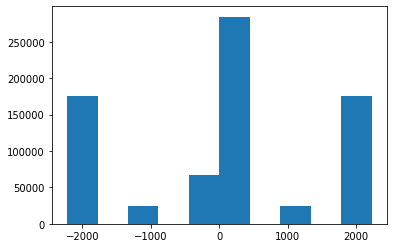

In [38]:
plt.hist(ak.flatten(truthID))

In [43]:
IDset = set(IDlist) #sweet, very handy, here are all the options:)

In [50]:
str(list(IDset)[0])

'2112'

In [59]:
ID_aspd = ak.to_pandas(ak.flatten(truthID))

In [51]:
IDdict = {'-2224':'anti-$\Delta^{++}$', '-2214':'anti-$\Delta^+$', '-2212':'antiproton', '-2114':'anti-$\Delta^0$',
          '-2112':'antineutron', '-1114':'anti-$\Delta^-$', '-211':'$\pi^-$ (?)', '-11':'positron', '11':'elecron',
          '22':'$\gamma$', '111':'$\pi^0$','211':'$pi^+$', '1114':'$\Delta^-$', '2112':'neutron', 
          '2114':'$\Delta^0$', '2212':'proton', '2214':'$\Delta^+$', '2224':'$\Delta^{++}$'}
#sooo my initial labelling is actually correct; the -ID deltas are antiparticles, not just opposite sign!

In [60]:
ID_aspd

,values
entry,
0,2114
1,2112
2,111
3,22
4,22
...,...
751869,22
751870,22
751871,2224


Text(12, 40000, '-2224 = anti-$\\Delta^{++}$\n -2214 = anti-$\\Delta^+$\n -2212 = antiproton\n -2114 = anti-$\\Delta^0$\n -2112 = antineutron\n -1114 = anti-$\\Delta^-$\n -211 = $\\pi^-$ (?)\n -11 = positron\n 11 = elecron\n 22 = $\\gamma$\n 111 = $\\pi^0$\n 211 = $pi^+$\n 1114 = $\\Delta^-$\n 2112 = neutron\n 2114 = $\\Delta^0$\n 2212 = proton\n 2214 = $\\Delta^+$\n 2224 = $\\Delta^{++}$')

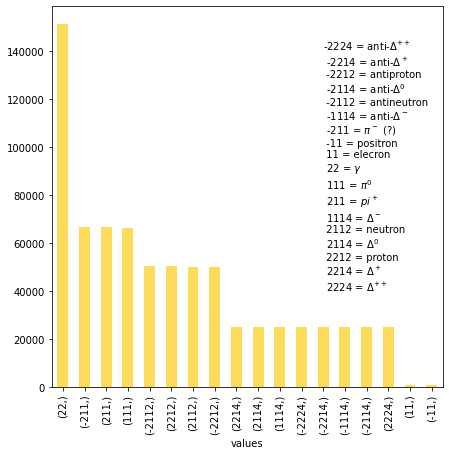

In [76]:
plt.figure(figsize=[7,7])
ID_aspd.value_counts().plot(kind='bar', color='xkcd:light gold')
plt.text(12,40000, '-2224 = anti-$\Delta^{++}$\n -2214 = anti-$\Delta^+$\n -2212 = antiproton\n -2114 = anti-$\Delta^0$\n -2112 = antineutron\n -1114 = anti-$\Delta^-$\n -211 = $\pi^-$ (?)\n -11 = positron\n 11 = elecron\n 22 = $\gamma$\n 111 = $\pi^0$\n 211 = $pi^+$\n 1114 = $\Delta^-$\n 2112 = neutron\n 2114 = $\Delta^0$\n 2212 = proton\n 2214 = $\Delta^+$\n 2224 = $\Delta^{++}$')

In [74]:
vec4d

<MomentumArray4D [[{pt: 7.43, eta: -0.526, ... ID: 211}]] type='200000 * var * M...'>